## Example 3.2 (failure of ESS)

In [2]:
library(tidyverse)
library(here)
source(here("code/setup.R"))

pdf 
  2

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3307 41.5327 58.5151 53.3383 71.1417 83.3823 

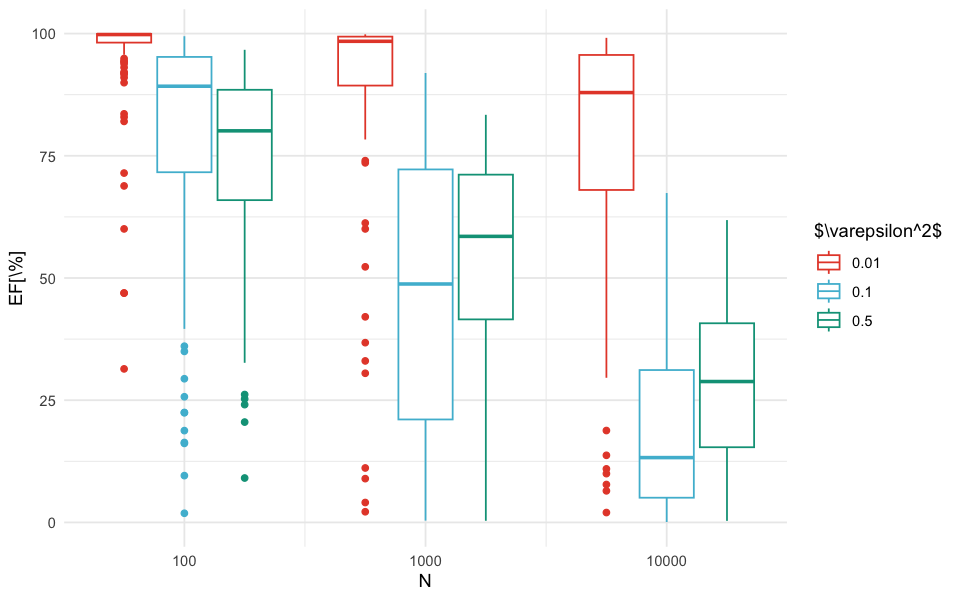

In [10]:
w <- function(x, eps) 1 / 2 * (1 + dnorm(x, 0, eps^(-2)) / dnorm(x))
ess <- function(x, eps) sum(w(x, eps))^2 / sum(w(x, eps)^2)
ef <- function(x, eps) ess(x, eps) / length(x) * 100

M <- 100
Ns <- c(100, 1000, 10000)
eps2 <- c(.01, .1, .5)
set.seed(454334534)
simulations <- 
expand_grid(eps2 = eps2, N = Ns) %>%
    group_by(eps2, N) %>%
    mutate(ef = list(replicate(M, ef(rnorm(N), sqrt(eps2))))) %>%
    unnest(cols = c(ef)) 

simulations %>%
    ggplot(aes(N, ef, color = factor(eps2), group = interaction(eps2, N))) +
    geom_boxplot() +
    scale_x_log10(breaks = Ns) +
    ylim(0, 100) +
    labs(x = "N", y = "EF[\\%]", color = "$\\varepsilon^2$")

ggsave_tikz(here("tikz/ess_failure.tex"), width = 6, height = 4)
simulations %>% 
    filter(N == 1000, eps2 == .5) %>%
    pull(ef) %>%
    summary()